In [1]:
import logging
import os
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2ycbcr, ycbcr2rgb, rgb2gray
from keras.callbacks import ModelCheckpoint
from pyjet.data import NpDataset, DatasetGenerator

from training import load_model, load_train_setup
from models.model_utils import reset_model
import data_utils as dsb
from utils import safe_open_dir
from run_model import train_model, test_model

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

# Set up some globals
SEED = 42
np.random.seed(SEED)

TRAIN_ID = "train-unet-1"
train_config = load_train_setup(TRAIN_ID)
print("Training Configuration:")
pprint(train_config)

Using TensorFlow backend.


PyJet is using CUDA.
Training Configuration:
{'augment': {'cval': 0,
             'fill_mode': 'constant',
             'height_shift_range': 0.2,
             'horizontal_flip': True,
             'rotation_range': 180,
             'shear_range': 0.1,
             'vertical_flip': True,
             'width_shift_range': 0.2,
             'zoom_range': 0.1},
 'augment_times': 10,
 'batch_size': 32,
 'epochs': 1,
 'img_size': [256, 256],
 'kfold': None,
 'model': 'unet-1',
 'seed': 7}


In [2]:
train_ids, rgb_x_train, y_train = dsb.load_train_data(path_to_train="../input/train/", 
                                                  img_size=train_config["img_size"],
                                                  num_channels=3, mode='rgb')

2018-04-02 23:11:03,569 : INFO : Loading 670 train images
100%|██████████| 670/670 [01:45<00:00,  6.34it/s]


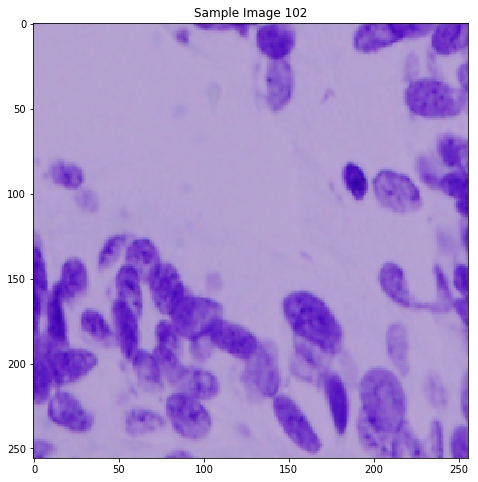

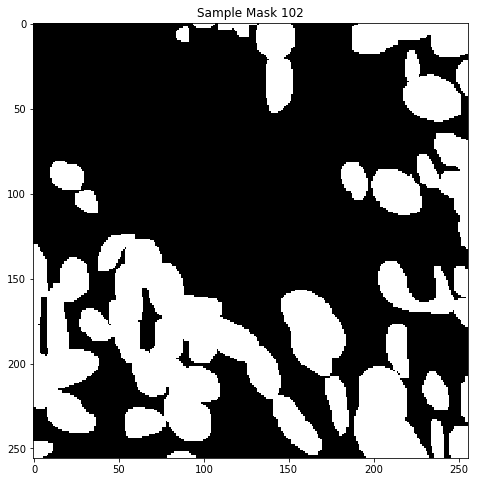

In [3]:
# Choose a random image to display
img_id = np.random.randint(len(rgb_x_train))
plt.imshow(rgb_x_train[img_id])
plt.title("Sample Image %s" % img_id)
plt.show()
plt.imshow(y_train[img_id,...,0], cmap='gray')
plt.title("Sample Mask %s" % img_id)
plt.show()

In [5]:
def batch_func(X, func):
    return np.array([func(x) for x in X])

ycbcr_xtrain = batch_func(rgb_x_train, rgb2ycbcr)
gray_xtrain = batch_func(rgb_x_train, rgb2gray)

In [14]:
def normalize(img, max_val=255):
#     midval = (np.max(img) + np.min(img)) / 2
    mean = np.average(img)
    if mean > (max_val / 2):
        return max_val - img
    return img

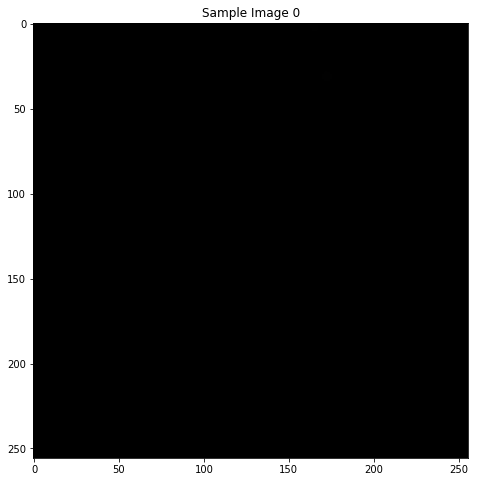

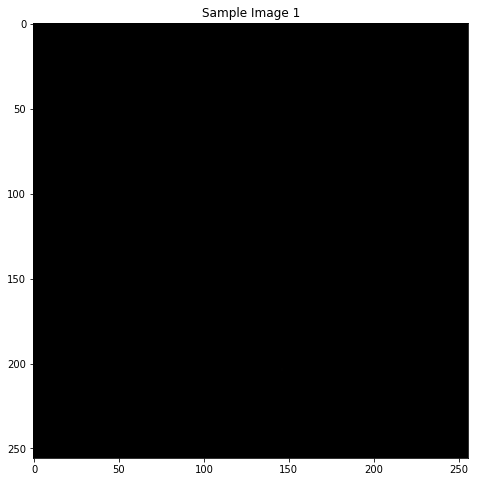

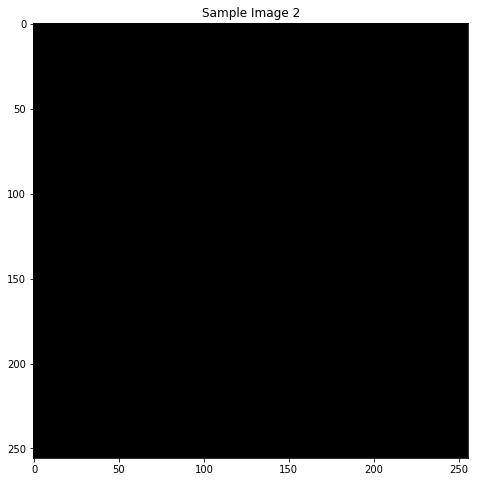

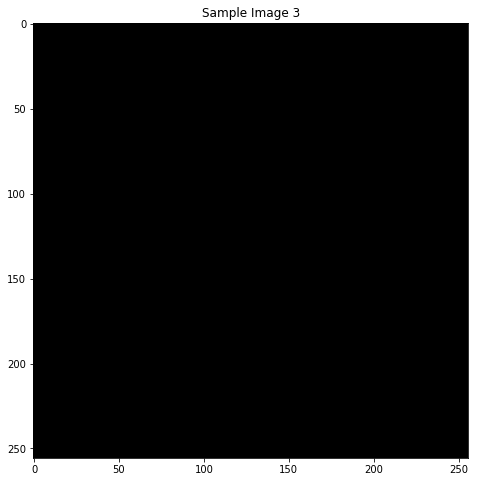

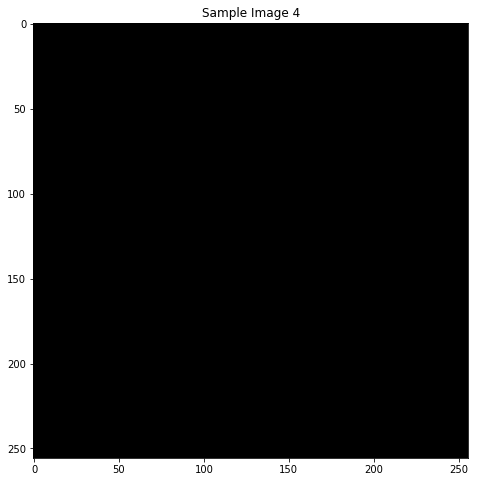

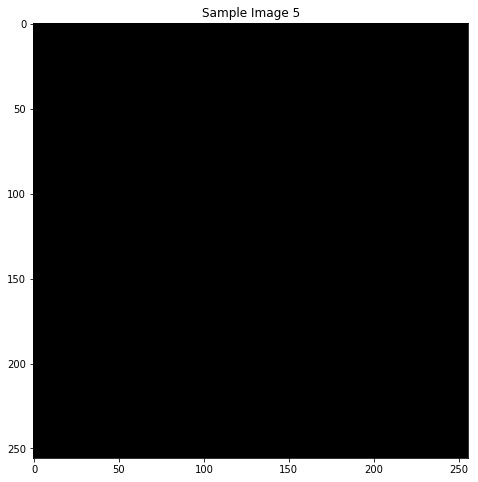

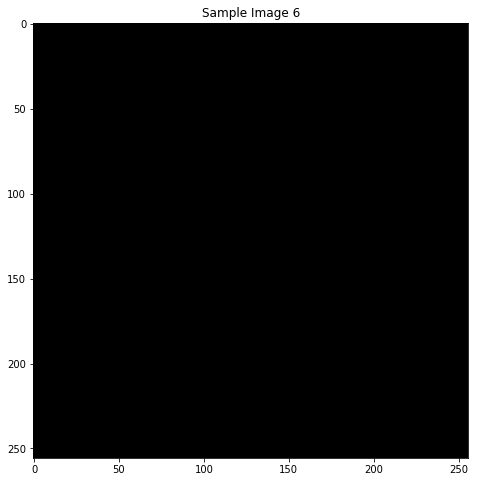

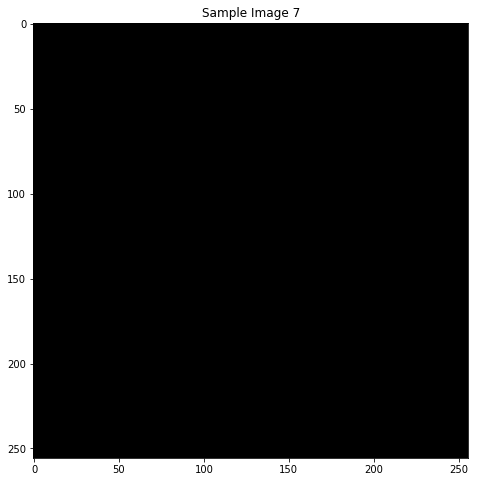

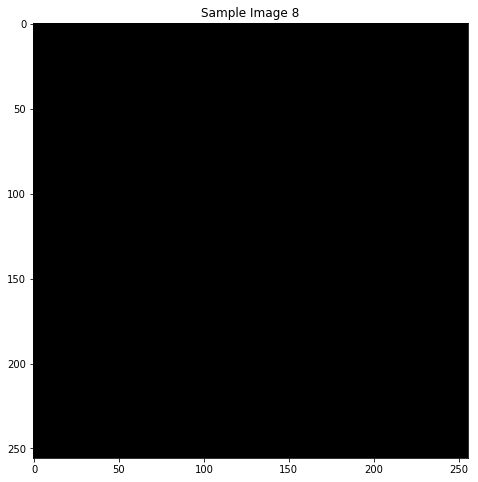

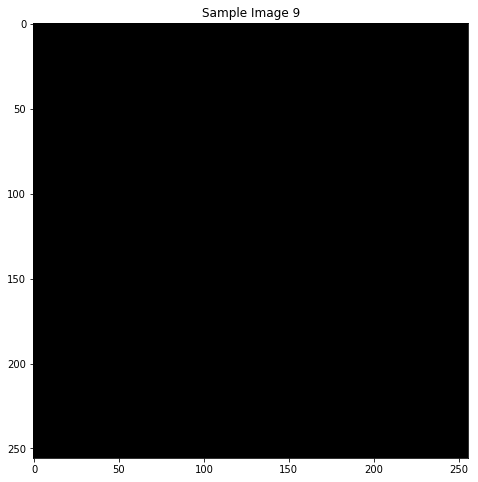

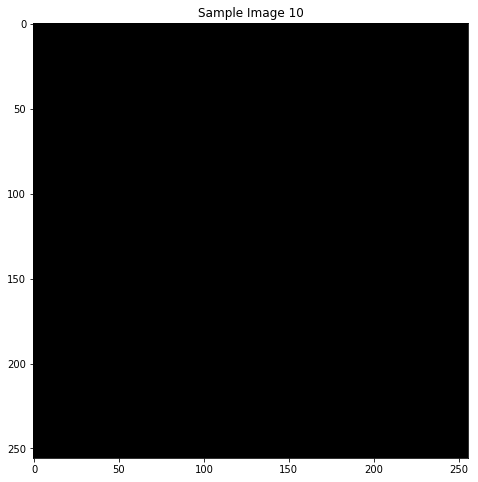

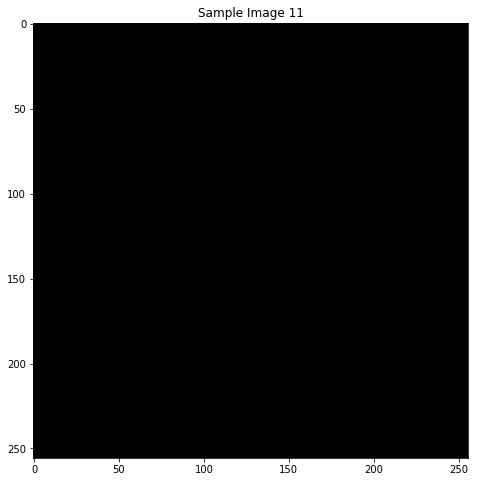

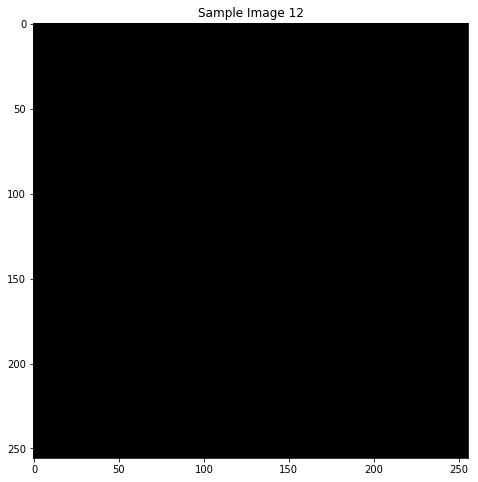

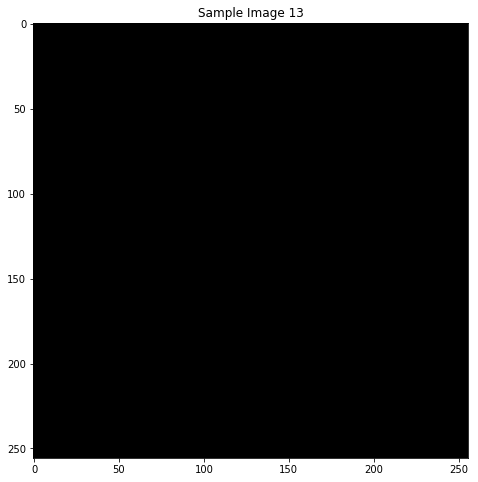

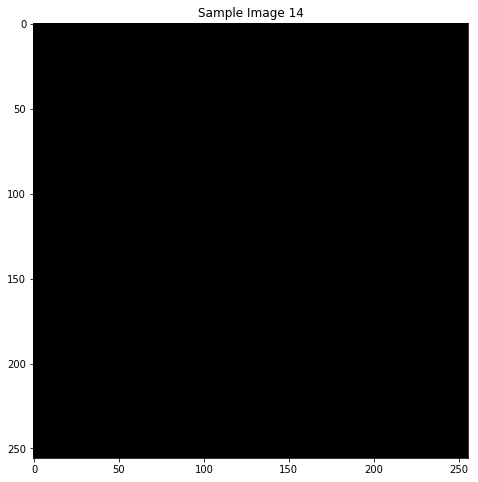

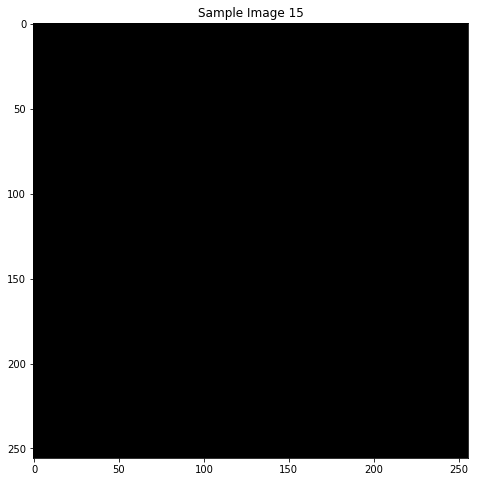

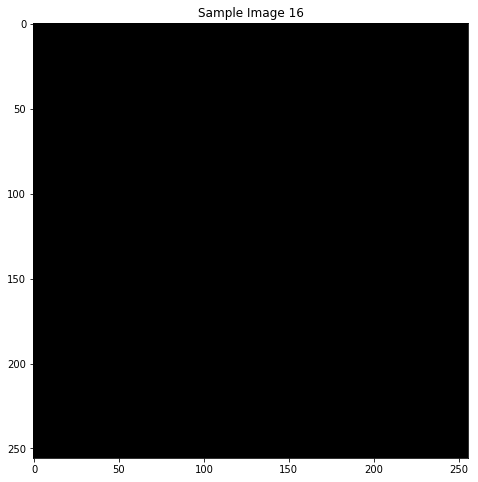

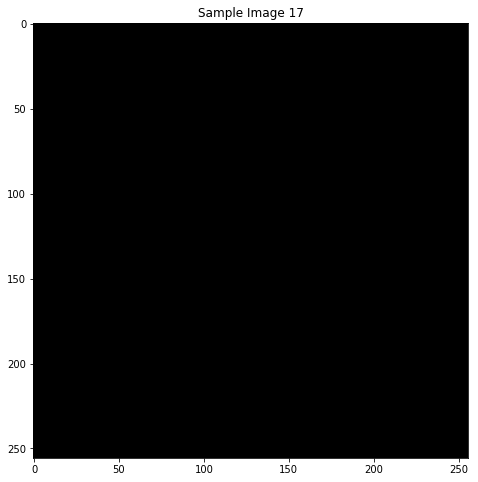

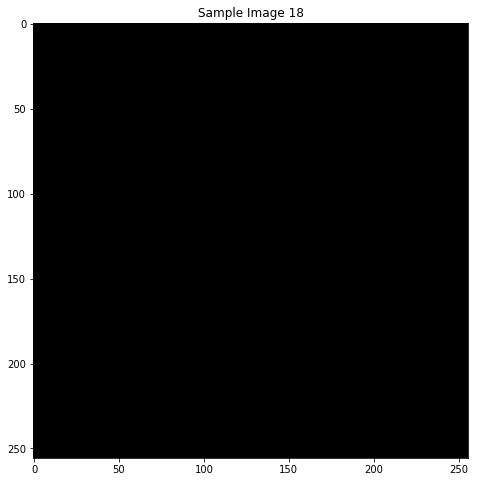

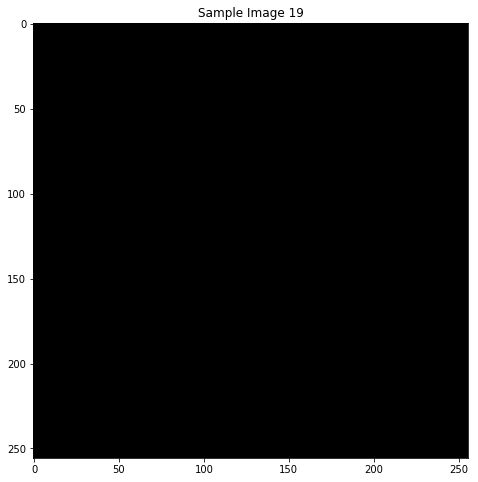

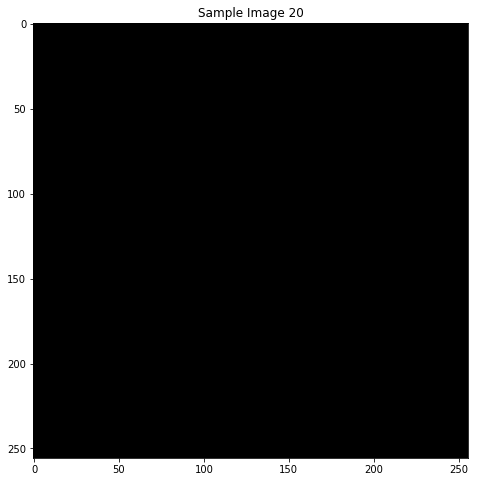

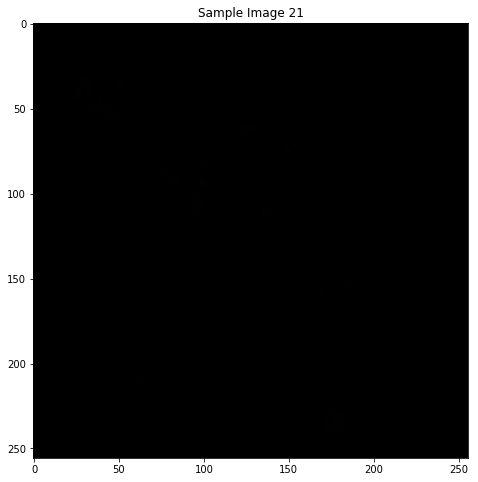

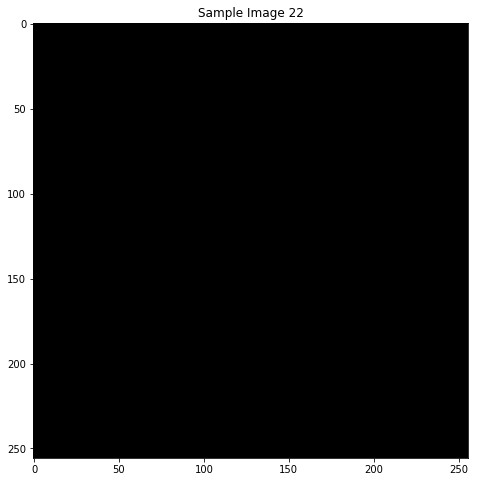

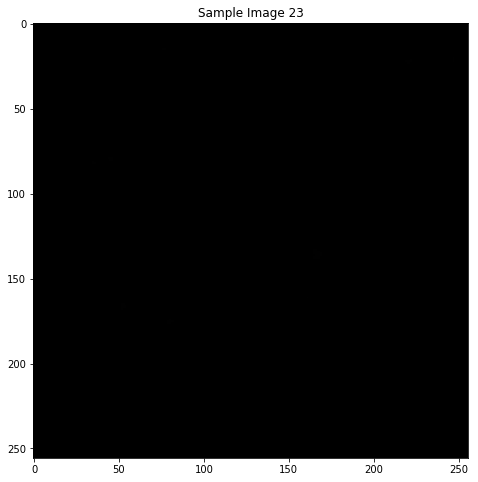

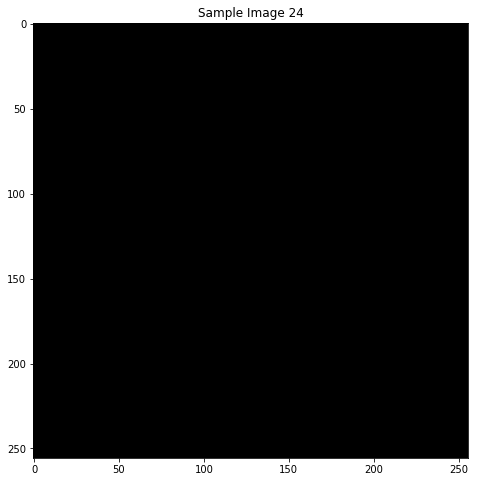

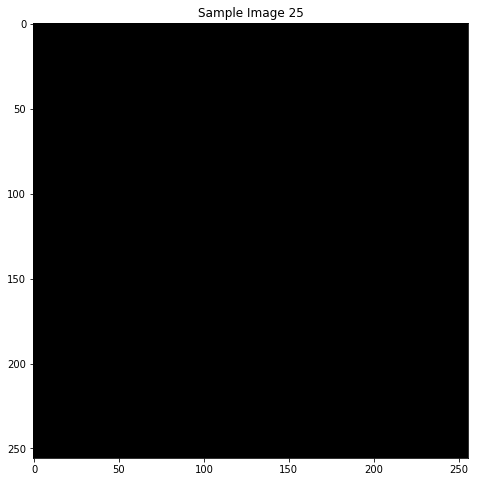

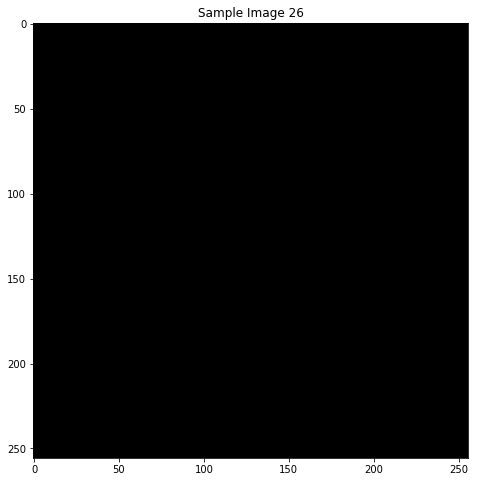

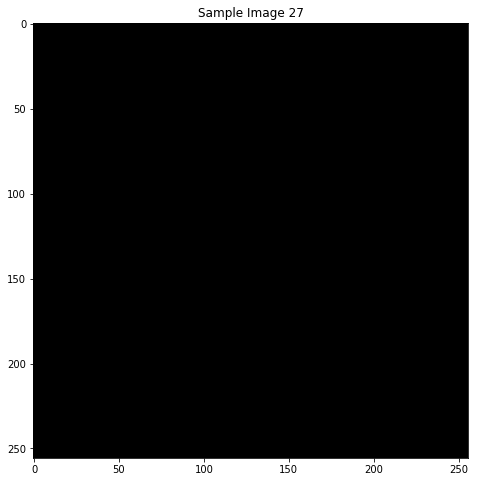

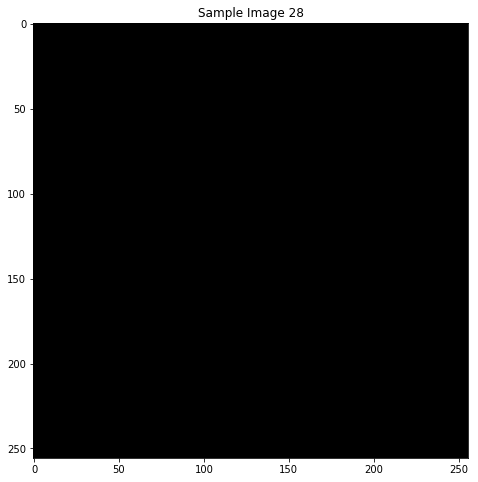

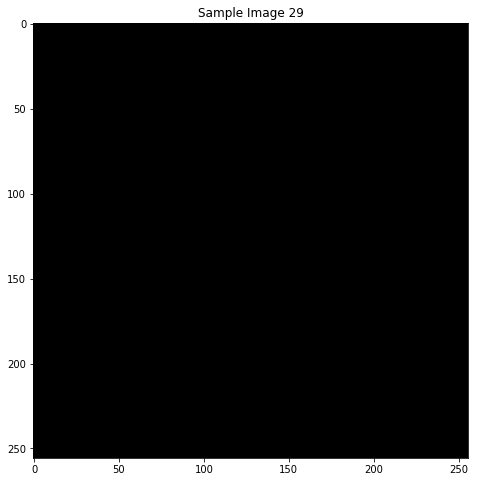

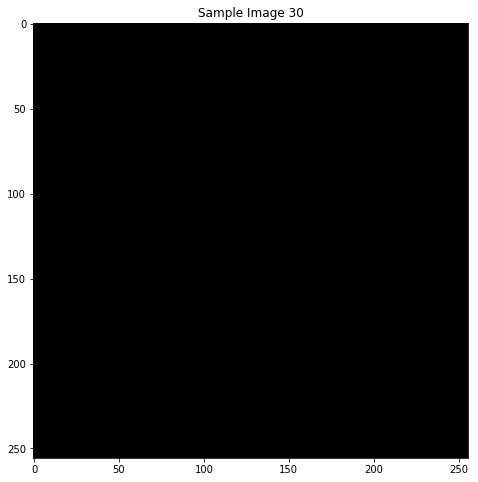

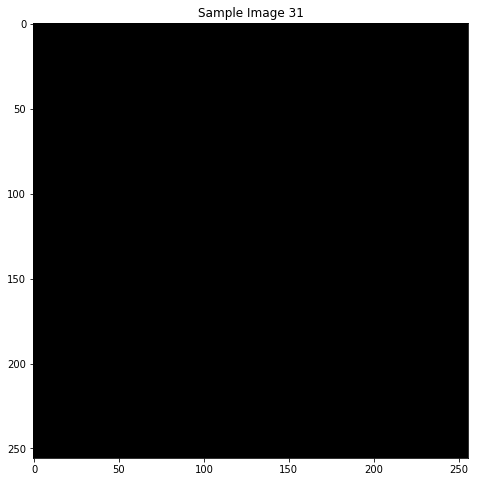

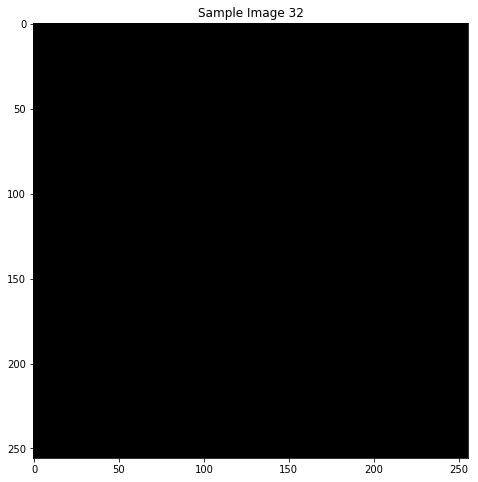

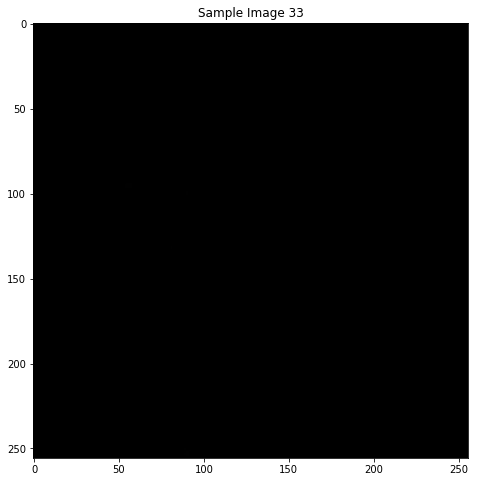

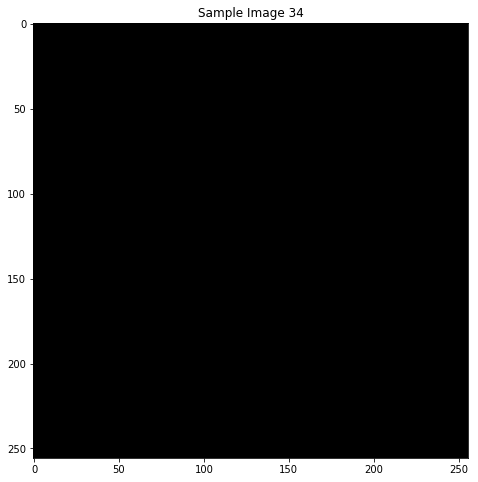

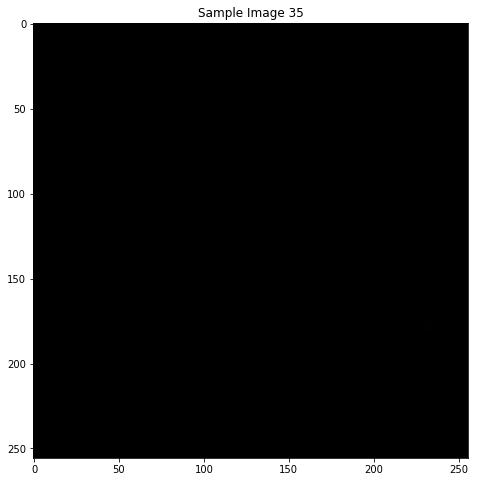

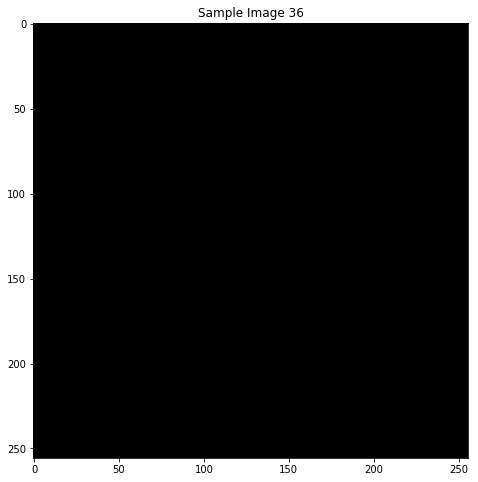

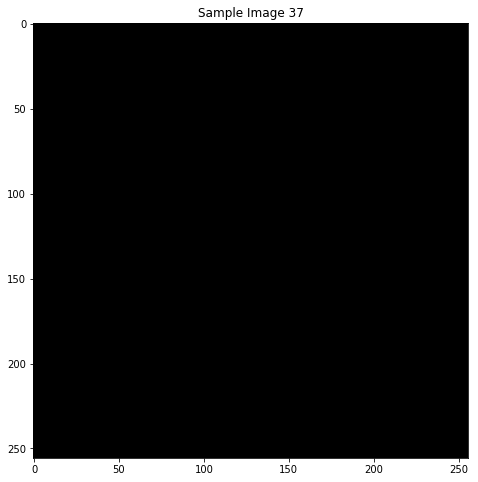

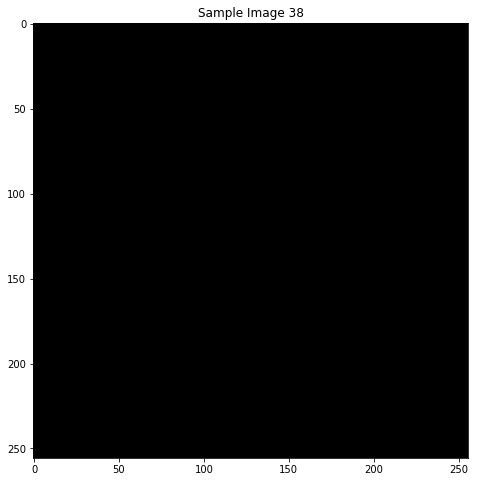

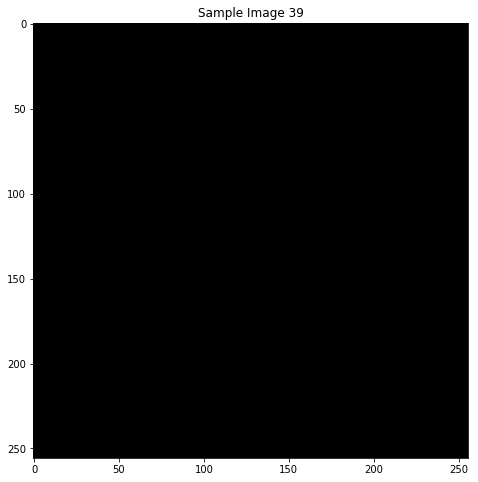

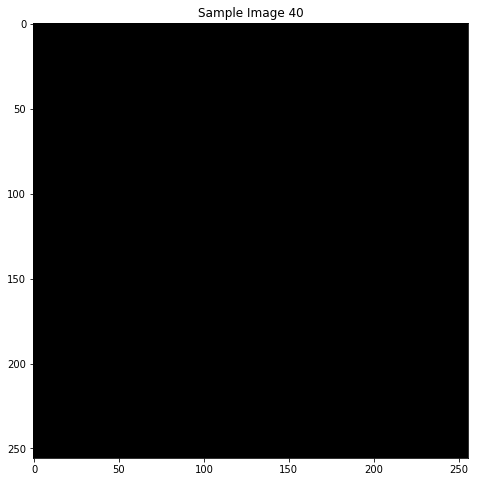

KeyboardInterrupt: 

In [16]:
x = ycbcr_xtrain
for i in range(len(x)):
    plt.imshow(ycbcr2rgb(normalize(x[i], max_val=235)).astype(np.uint8))
    plt.title("Sample Image %s" % i)
    plt.show()